Module 5 Case study 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read the data

# DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.

df = pd.read_csv('1937_m5_datasets_v1_721_pp8jgl2/Salaries.csv', low_memory=False)
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148643,148646,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,PT
148644,148648,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,PT
148645,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,PT
148646,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,PT


In [4]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148648 entries, 0 to 148647
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148648 non-null  int64  
 1   EmployeeName      148648 non-null  object 
 2   JobTitle          148648 non-null  object 
 3   BasePay           148043 non-null  float64
 4   OvertimePay       148648 non-null  float64
 5   OtherPay          148648 non-null  float64
 6   Benefits          112490 non-null  float64
 7   TotalPay          148648 non-null  float64
 8   TotalPayBenefits  148648 non-null  float64
 9   Year              148648 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148648 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 14.7+ MB


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36158
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148648
Agency                   0
Status              110529
dtype: int64

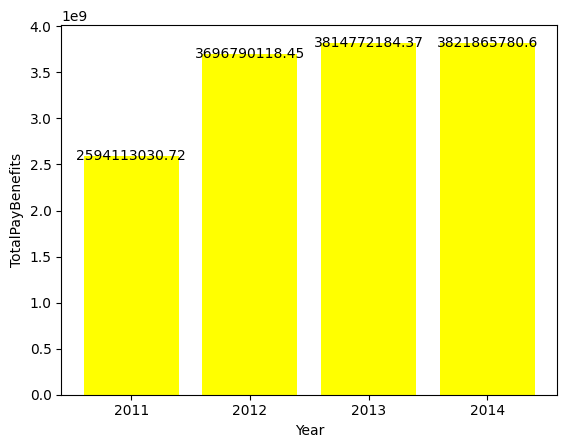

Year
2011    2.594113e+09
2012    3.696790e+09
2013    3.814772e+09
2014    3.821866e+09
Name: TotalPayBenefits, dtype: float64
Pay has increased from 2011 to 2012 and has had slight increases from the year 2012 - 2014


In [8]:

# 1. Compute how much total salary cost has increased from the year 2011 to 2014

pay = df.groupby('Year')['TotalPayBenefits'].sum()

bars = plt.bar(pay.index, pay.values, color='yellow')
#plt.xticks([2011,2012,2013,2014])
for bar in bars:
    plt.text(bar.get_x()+ bar.get_width()/2, bar.get_height(), str(bar.get_height()), 
             ha='center', va='center')
plt.xticks(pay.index)
plt.xlabel('Year')
plt.ylabel('TotalPayBenefits')
plt.show()

print(pay)

print('Pay has increased from 2011 to 2012 and has had slight increases from the year 2012 - 2014')


In [23]:

# 2. Which Job Title in the Year 2014 has the highest mean salary?

meansal = df.query('Year == 2014').groupby('JobTitle')['TotalPayBenefits'].mean()  #query -string based expression
print('Job Title with highest mean salary:', meansal.sort_values(ascending=False).index[0])

Job Title with highest mean salary: Chief Investment Officer


In [12]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [10]:

# 3. How much money could have been saved in the Year 2014 by stopping OverTimePay?

Overtime = int(df[df['Year'] == 2014]['OvertimePay'].sum())
print('Amount that could have been saved:', Overtime)

Amount that could have been saved: 205918599


In [98]:
# 4. Which are the top 5 common jobs in the Year 2014 and how much do they cost SFO?

topcommonjobs = df.query("Year == 2014")['JobTitle'].value_counts().head(5).index
print('Top 5 common jobs in the year 2014 are:\n'
,df.query('JobTitle in @topcommonjobs').groupby('JobTitle')['TotalPayBenefits'].sum().sort_values(ascending=False))


#top5 = commonjobs[['JobTitle','']].sort_values(ascending=False)

Top 5 common jobs in the year 2014 are:
 JobTitle
Transit Operator                6.477816e+08
Registered Nurse                5.665697e+08
Firefighter                     4.319727e+08
Special Nurse                   1.596379e+08
Public Svc Aide-Public Works    2.422834e+07
Name: TotalPayBenefits, dtype: float64


In [75]:

# 5. Who was the top earning employee across all the years?

print('Top earning employee across all the years is:',
df.groupby('EmployeeName')['TotalPayBenefits'].sum().sort_values(ascending=False).index[0])

# to find the TotalPayBenefits of the top employee of all the years
# df.groupby('EmployeeName')['TotalPayBenefits'].sum().sort_values(ascending=False).iloc[0] 
#  values[0] works the same iloc[0]

Top earning employee across all the years is: Kevin Lee


In [83]:

# 1. Which are the last 5 common jobs in the Year 2014 and how much do they cost SFO?

leastcommonjobs = df.query('Year == 2014')['JobTitle'].value_counts().tail(5).index

print('Least common jobs with the cost to SFO:\n', df.query('JobTitle in @leastcommonjobs').groupby('JobTitle')['TotalPayBenefits'].sum().sort_values(),'\n')

# for all years
# leastcommonjobs = df['JobTitle'].value_counts().tail(5).index

# 2. In year 2014 OverTimePay was what percentage of TotalPayBenefits

overtimepaysum = df.query('Year == 2014')['OvertimePay'].sum()
totalpaybenefitssum = df.query('Year == 2014')['TotalPayBenefits'].sum()
perc = (overtimepaysum/totalpaybenefitssum)*100
print(f'OverTimePay was {perc: .2f}% of TotalPayBenefits\n')

# 3. Which Job Title in the Year 2014 has the lowest mean salary?

print('Job Title in the year 2014 with lowest mean salary:', meansal.sort_values(ascending=True).index[0])

# alternate way
# meansal.sort_values(ascending=False).index[-1]


Least common jobs with the cost to SFO:
 JobTitle
Cashier 3                          2074.60
Sctry, Human Svcs. Commission    117800.40
Signal and Systems Engineer      154869.67
Chief Nursery Specialist         281776.61
Chief Investment Officer         436224.36
Name: TotalPayBenefits, dtype: float64 

OverTimePay was  5.39% of TotalPayBenefits

Job Title in the year 2014 with lowest mean salary: BdComm Mbr, Grp2,M=$25/Mtg
